In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv("drug200.csv")
data.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [67]:
le_sex = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])

le_bp = LabelEncoder()
data['BP'] = le_bp.fit_transform(data['BP'])

le_chol = LabelEncoder()
data['Cholesterol'] = le_chol.fit_transform(data['Cholesterol'])

le_drug = LabelEncoder()
data['Drug'] = le_drug.fit_transform(data['Drug'])

In [69]:
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [77]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [78]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40

[[ 5  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 18]]


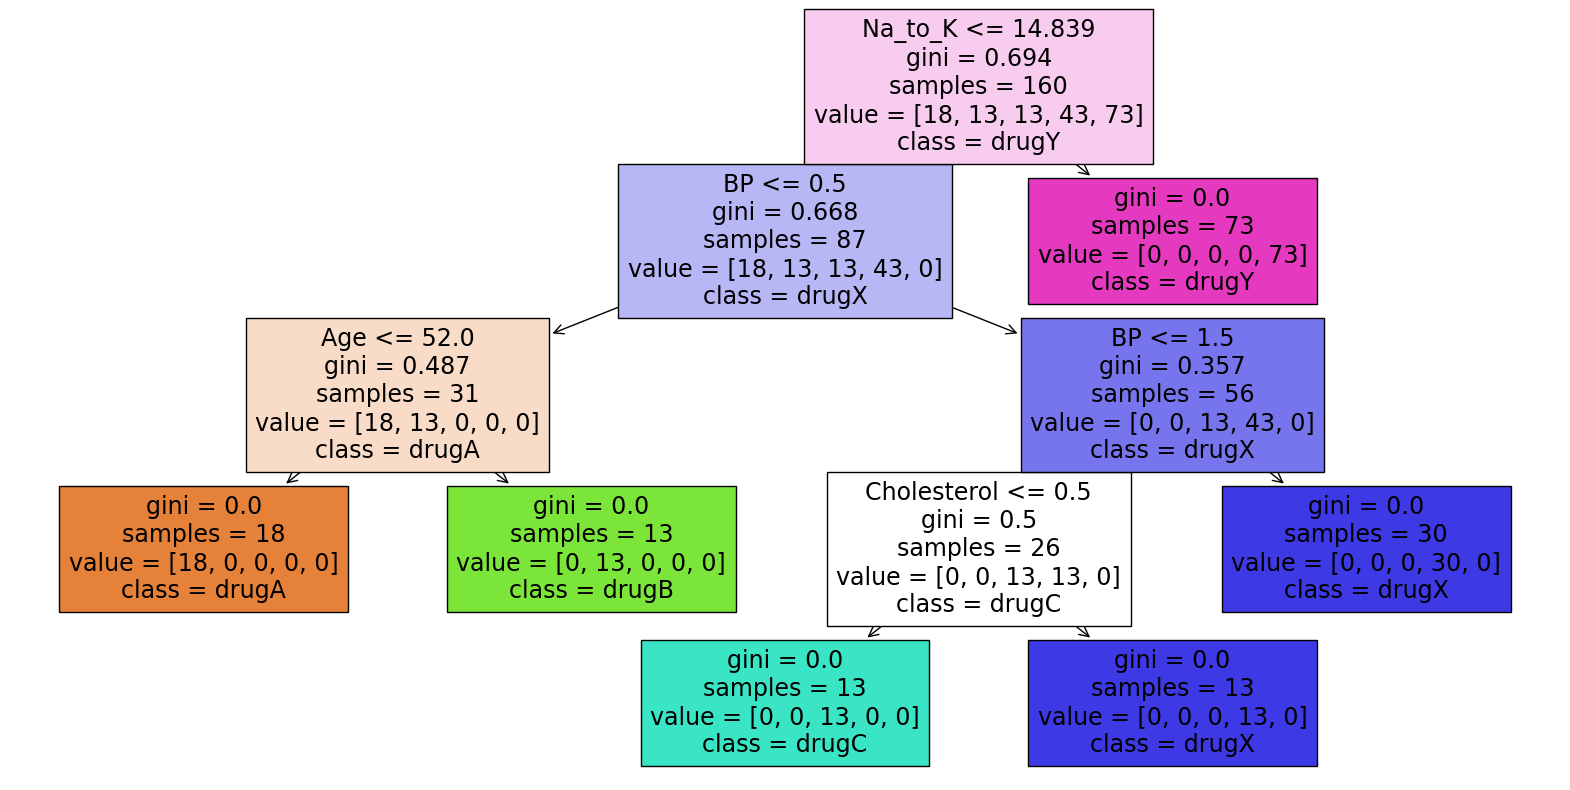

In [79]:
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=[str(f) for f in X.columns],  
    class_names=[str(c) for c in le_drug.classes_],  
    filled=True
)
plt.show()
